In [2]:
import glob
import numpy as np
import matplotlib.pylab as plt
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
ev_to_mev=1000
colors=['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999']*3
mev_to_kj=96.485307/1000.


In [3]:
E_files=sorted(glob.glob('FinalModel/*.e.out'))
nwaters=dict()
with open('NATOMS.txt','r') as fp:
    lines=fp.readlines()
    for l in lines:
        ls=l.split()
        nwaters[ls[1]]=int(ls[0])//3
print(nwaters)

{'00_dlpoly_198K': 256, '00_dlpoly_208K': 256, '00_dlpoly_213K': 256, '00_dlpoly_218K': 256, '00_dlpoly_223K': 256, '00_dlpoly_228K': 256, '00_dlpoly_238K': 256, '00_dlpoly_248K': 256, '00_dlpoly_258K': 256, '00_dlpoly_268K': 256, '00_dlpoly_278K': 256, '00_dlpoly_288K': 256, '00_dlpoly_298K': 256, '00_dlpoly_308K': 256, '00_dlpoly_318K': 256, '00_dlpoly_328K': 256, '00_dlpoly_338K': 256, '00_dlpoly_348K': 256, '00_dlpoly_368K': 256, '01_MB-polRefLiquidHighPressure_198K': 256, '01_MB-polRefLiquidHighPressure_203K': 256, '01_MB-polRefLiquidHighPressure_208K': 256, '01_MB-polRefLiquidHighPressure_213K': 256, '01_MB-polRefLiquidHighPressure_218K': 256, '01_MB-polRefLiquidHighPressure_223K': 256, '01_MB-polRefLiquidHighPressure_228K': 256, '01_MB-polRefLiquidHighPressure_238K': 256, '01_MB-polRefLiquidHighPressure_268K': 256, '01_MB-polRefLiquidHighPressure_298K': 256, '05_DPUnstable_198K': 256, '05_DPUnstable_208K': 256, '05_DPUnstable_213K': 256, '05_DPUnstable_218K': 256, '05_DPUnstable

<Figure size 720x450 with 0 Axes>

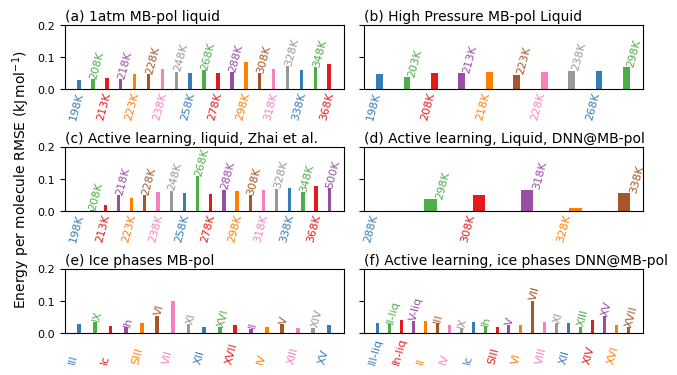

In [6]:
plt.figure(figsize=(7.2,4.5))
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlepad'] = -10
indices=['00','01','05','06','10','15']
num=[0,0,0,0,0,0]
titles=['(a) 1atm MB-pol liquid','(b) High Pressure MB-pol Liquid','(c) Active learning, liquid, Zhai et al.','(d) Active learning, Liquid, DNN@MB-pol','(e) Ice phases MB-pol','(f) Active learning, ice phases DNN@MB-pol']
fig, axs = plt.subplots(3, 2,figsize=(7.2,4),sharey=True)
axs=axs.flatten()
numbs=dict()
for i, ef in enumerate(E_files):
    
    E=np.atleast_2d(np.loadtxt(ef))
    dE=E[:,0]-E[:,1]
    name=ef.replace('FinalModel/','').replace('.e.out','')
    N=name.split('_')[0]
    outname=name.replace('10_MB-polRefOrthogonalIce_','').replace('10_MB-polRefTriclinicIce_','')
    outname=outname.replace('15_','').replace('01_MB-polRefLiquidHighPressure_','').replace('00_dlpoly_','').replace('05_DPUnstable_','')
    outname=outname.replace('06_DPLessAcc_','').replace('Ice_','').replace('_','-').replace('Ice','').replace('Liquid','liq')
    y=np.std(dE)*ev_to_mev/nwaters[name]
    axs[indices.index(N)].bar(i-0.25,y*mev_to_kj,width = 0.25,color=colors[num[indices.index(N)]])
    
    if (num[indices.index(N)])%2:
        axs[indices.index(N)].text(i,y*mev_to_kj, outname, rotation=75,size=8,rotation_mode='anchor',color=colors[num[indices.index(N)]])
    else:
        axs[indices.index(N)].text(i-0.5,-1*mev_to_kj, outname, rotation=75,size=8,rotation_mode='anchor',color=colors[num[indices.index(N)]])

    num[indices.index(N)]+=1

for i, title in enumerate(titles):
    axs[i].annotate(title,xy=(0,1.07),xycoords='axes fraction')
    #axs[i].set_title('  '+title)#,loc='left')
    axs[i].set_ylim([0,0.2])
    axs[i].set_xticks([])
axs[2].set_ylabel(r'Energy per molecule RMSE (kJ$\,$mol$^{-1}$)')
axs[2].set_ylabel(r'Energy per molecule RMSE (kJ$\,$mol$^{-1}$)')
plt.tight_layout(h_pad=-.3)
!rm -rf figs
!mkdir figs/
plt.savefig('figs/RmseEnergy.png',dpi=300,bbox_inches='tight')
plt.savefig('figs/RmseEnergy.pdf',bbox_inches='tight')